In [46]:
import numpy as np
from scipy.io import arff
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


In [47]:
data = pd.read_csv('https://richardson.byu.edu/220/neighborhood_survey.csv')
data.to_csv('neighborhood_survey.csv', index=False)
data.head(10)

,income,house_price,age,height,car_price,education_years,work_hours,social_media_followers,screen_time,vacation_expenditure
0,1.686915e+08,1.117484e+09,26.828250,162.723079,5.137170e+07,15.663517,38.613805,145576.854228,149.925895,3.542033e+06
1,1.153221e+08,5.881274e+08,10.374250,153.588600,1.699632e+07,18.076600,38.711946,264772.717688,206.585089,1.172654e+06
2,2.658110e+08,1.525769e+10,21.570425,148.432152,1.415462e+08,9.587076,45.871163,50686.001524,153.330014,1.909575e+06
3,6.315472e+06,2.452819e+09,36.362952,168.286582,1.055243e+08,17.332708,39.898447,125534.745026,149.508669,1.576310e+06
4,1.124220e+07,1.019097e+10,43.829227,183.382357,4.914229e+07,15.672139,34.653167,160203.229268,182.673401,1.050240e+07
5,6.330024e+07,1.564960e+09,17.486979,184.346404,2.295916e+07,17.799474,30.063232,38312.837358,185.634920,1.715029e+06
6,6.284546e+07,2.241467e+08,22.485755,162.372238,2.811419e+07,16.326277,40.653183,226001.206218,171.745193,3.696483e+06
7,2.905336e+07,1.334366e+09,52.645460,161.030443,2.007617e+06,19.884391,37.009946,116386.391874,158.938851,2.540218e+06
8,5.452473e+08,1.175631e+09,30.661007,162.617737,4.953787e+07,15.488048,42.746572,78209.710959,212.817660,1.911578e+06
9,5.830689e+06,4.163647e+09,40.057001,175.101102,2.100896e+07,18.201219,41.974097,267822.121262,142.509367,4.417239e+05


In [60]:
# because we assume a normal distribution the MLE for the mean and standard deviation are the sample mean and sample standard deviation

mle_results = {}

for column in data.columns:
    
    mean_mle = data[column].mean()
    std = data[column].std()
    std_mle = np.sqrt(np.sum((data[column] - mean_mle)**2) / len(data))
    mle_results[column] = {'mean_mle': mean_mle, 'std_mle': std_mle, 'std': std}

mle_df = pd.DataFrame.from_dict(mle_results, orient='index').reset_index()
mle_df.columns = ['Variable', 'Mean (MLE)', 'Standard Deviation (MLE)', 'Standard Deviation']
mle_df




,Variable,Mean (MLE),Standard Deviation (MLE),Standard Deviation
0,income,2.059959e+08,2.007804e+08,2.008809e+08
1,house_price,4.967880e+09,4.925294e+09,4.927759e+09
2,age,3.483779e+01,9.853826e+00,9.858756e+00
3,height,1.679929e+02,1.008771e+01,1.009275e+01
4,car_price,5.064881e+07,5.011507e+07,5.014014e+07
5,education_years,1.598509e+01,2.953028e+00,2.954505e+00
6,work_hours,4.011430e+01,7.151000e+00,7.154578e+00
7,social_media_followers,2.014321e+05,2.006445e+05,2.007449e+05
8,screen_time,1.785814e+02,3.896095e+01,3.898044e+01
9,vacation_expenditure,5.039727e+06,5.069980e+06,5.072516e+06


In [65]:
percentage_results = {}

for column in data.columns:
    mean = mle_results[column]['mean_mle']
    std = mle_results[column]['std_mle']
    
    
    
    range_1_std = data[(data[column] >= mean - std) & (data[column] <= mean + std)].shape[0] / data.shape[0] * 100
    range_2_std = data[(data[column] >= mean - 2*std) & (data[column] <= mean + 2*std)].shape[0] / data.shape[0] * 100
    percentage_results[column] = {'range_1_std': range_1_std, 'range_2_std': range_2_std}

percentage_df = pd.DataFrame.from_dict(percentage_results, orient='index').reset_index()
percentage_df.columns = ['Variable', 'Within 1 Std (%)', 'Within 2 Stds (%)']
percentage_df


,Variable,Within 1 Std (%),Within 2 Stds (%)
0,income,84.8,94.5
1,house_price,85.1,93.9
2,age,67.3,95.2
3,height,69.5,95.1
4,car_price,84.9,95.1
5,education_years,68.2,95.3
6,work_hours,67.3,96.0
7,social_media_followers,86.2,95.7
8,screen_time,68.9,95.9
9,vacation_expenditure,86.1,95.3


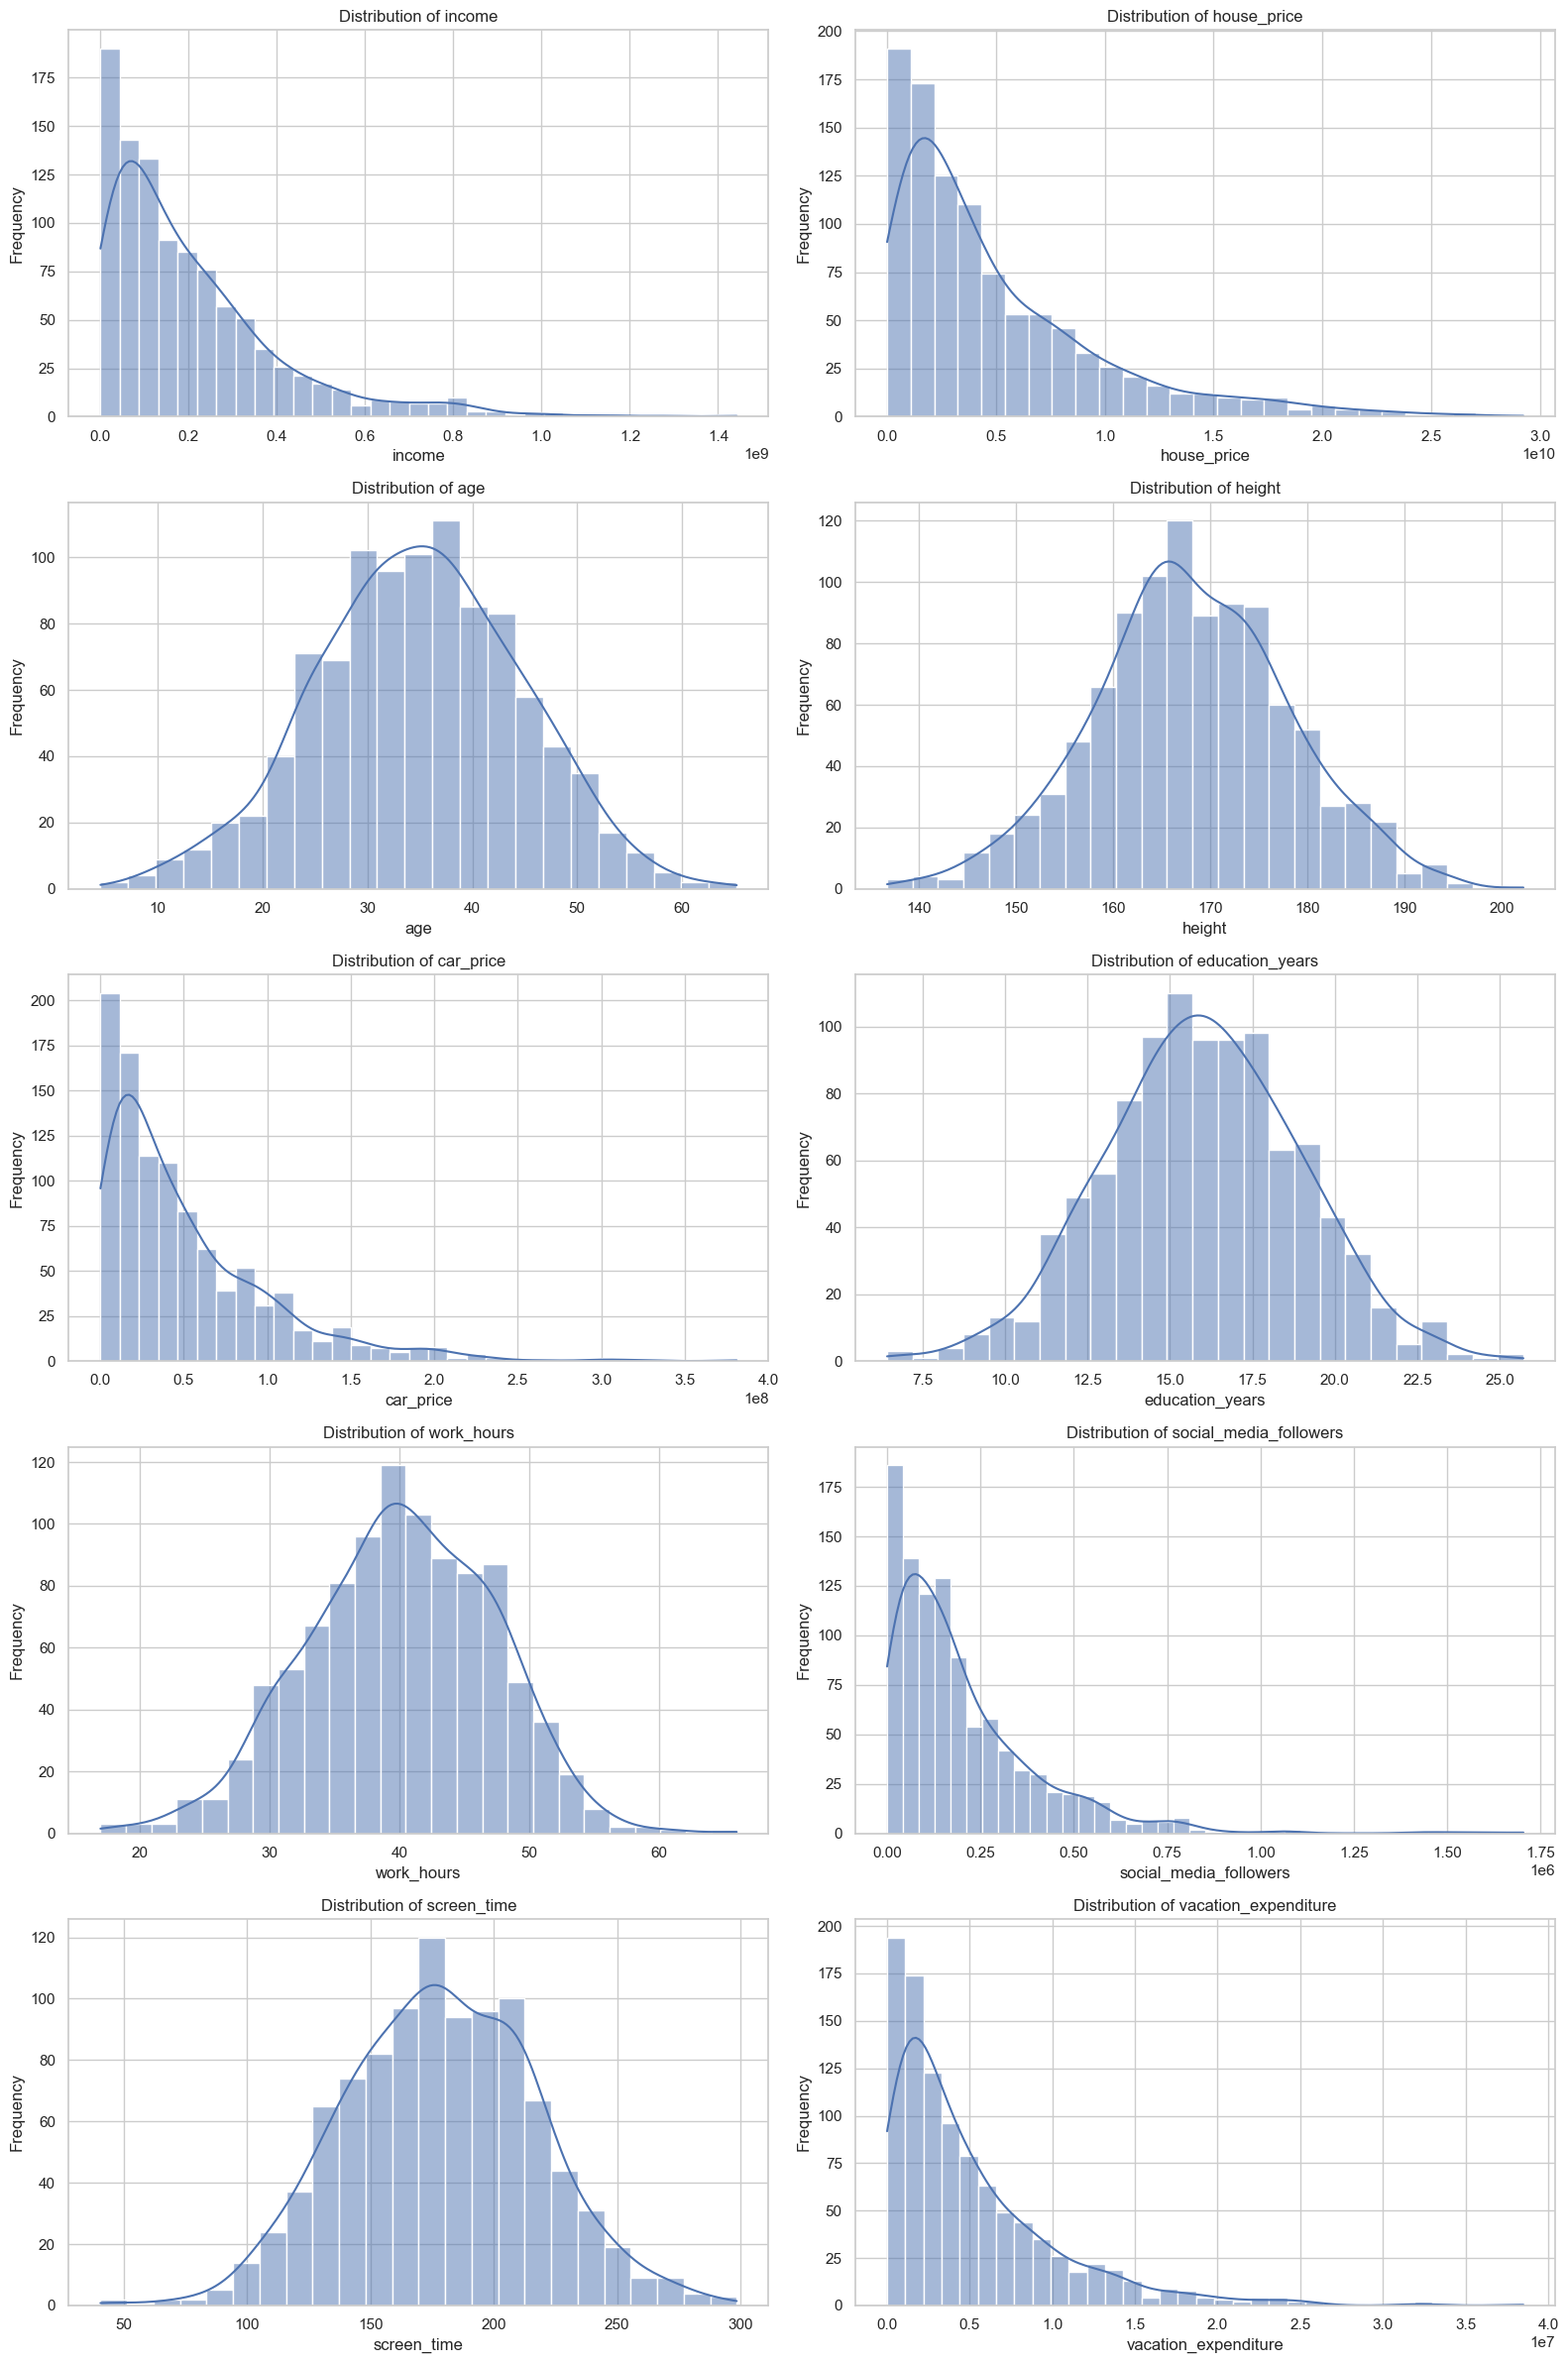

In [67]:

fig, axes = plt.subplots(5, 2, figsize=(16, 24))

axes = axes.flatten()


for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Analysis**<br>
The Distributions that do not adhere to to Normal Distributions are: <br>
1. Income <br>
2. House Price <br>
3. Car Price <br>
4. Social Media Followers <br>
5. Vacation Expenditure <br>

All of the graphs for these graphs show skewness which means that they do not adhere to normal distribution. The percentage of data that falls between 1 and 2 standard deviations also confirms that. For example, the percentages of data within 1 and 2 standard deviations for income are 84.9% and 94.5% respectively, which is far from the empirical rule.
---------------------------------------- <br>

The Distributions that adhere to Normal Distribution are: <br>
1. Age <br>
2. Height <br>
3. Education Years<br>
4. Work Hours <br>
5. Screen Time <br>

For all of these variables, the graphs shows a distribution that is approximately normal. The percentage of the data that falls between 1 and 2 standard deviations confrims that conclusion for all of these variables. For example, the percentages of data that falls between within 1 and 2 standard deviations for income are 84.9% and 94.5%, which means the distribution is not normal <br>


**Implications of findings on Homeowners Association** <br>
<br>
<br>
***For normally distributed data*** <br>
<br>

It shows thw variables that are balanced in the community and this infromation could be used differntly based on the variable. For age, it could be useful to know that the community is balanced in age meaning that there are a balanced number of people from all ages. This could be used to plan the amenities and events that could be planned for the community. Education yesrs and work hours could be used to understand the residents background better. <br>

***For non normally distibuted data*** <br>
<br>
Since income and house price are not normally distirbuted, it means that the socioeconomic status of residents is not equal. This could affect the type of amenities that are provided in order to make them accessible to all residents. <br>
It is also intresting to see that the social media followers distribution graph is skewed, which means that there is a chunck of the community that has a high number of followers on social media unlike the rest of the community. This could be used for promotional purposes. <br>


**General Implications**<br>
The data in general could be used to make decesions in the community including tailoring amenities based on the needs of the community, planning events that suits the community's age groups, making poilicies that are catered to the community's differnces and similarties. 


